# 🩺 Breast Cancer Classification Project

## 1. Dataset Description
We will be working with the **Breast Cancer Wisconsin Diagnostic Dataset**.  
- The dataset contains **569 records** of patients.  
- Each record has **30 numerical features** (e.g., radius, texture, perimeter, smoothness, etc.) that describe characteristics of cell nuclei present in breast cancer tissue.  
- The **target variable** is `Diagnosis`, which has two classes:
  - **M (Malignant)**
  - **B (Benign)**  

This is a **binary classification problem**, and we will use **Logistic Regression** to build our model.



In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [2]:
import pandas as pd

# The data is in a .data file and separated by commas.
# The first few lines are metadata and should be skipped.

features = features = [
    "ID number",
    "Diagnosis",
    "radius_mean",
    "texture_mean",
    "perimeter_mean",
    "area_mean",
    "smoothness_mean",
    "compactness_mean",
    "concavity_mean",
    "concave points_mean",
    "symmetry_mean",
    "fractal_dimension_mean",
    "radius_se",
    "texture_se",
    "perimeter_se",
    "area_se",
    "smoothness_se",
    "compactness_se",
    "concavity_se",
    "concave points_se",
    "symmetry_se",
    "fractal_dimension_se",
    "radius_worst",
    "texture_worst",
    "perimeter_worst",
    "area_worst",
    "smoothness_worst",
    "compactness_worst",
    "concavity_worst",
    "concave points_worst",
    "symmetry_worst",
    "fractal_dimension_worst"
]

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",
                 comment='#', sep=',',names=features)



## 2. Project Tasks

### 🔍 Step 1: Data Investigation
- Load the dataset and display its first few rows.
- Check for **null values** and **duplicate entries**.
- Explore the dataset summary (shape, data types, statistics).

### 📊 Step 2: Data Visualization
- Visualize distributions of features.
- Use histograms, boxplots, or pairplots to understand data spread.
- Check relationships between features and the target variable (`Diagnosis`).
- Check count of categorical features and whether classes are balanced or not

### ⚙️ Step 3: Data Preprocessing
- **Encoding:** Convert the categorical column `Diagnosis` into numeric values (e.g., Malignant = 1, Benign = 0).
- **Scaling:** Apply appropriate scaling (e.g., StandardScaler) to numeric features.
- **Drop irrelevant columns** like `ID number`.

### ✂️ Step 4: Train-Test Split
- Split the dataset into **train** and **test** sets.  
- Use the parameter `stratify=y` to ensure class distribution remains the same in both sets.  
- Check if the classes are **balanced**:
  - If imbalanced, either:
    - Handle using techniques like oversampling/undersampling, SMOTE OR  
    - Use the `class_weight="balanced"` parameter in Logistic Regression.

### 🤖 Step 5: Model Training
- Train a **Logistic Regression** model on the training data.

### 📈 Step 6: Model Evaluation
Evaluate the model using:
1. **Confusion Matrix**  
   - Display the confusion matrix.  
   - Visualize it using a heatmap.  
2. **ROC Curve and AUC**  
   - Plot the ROC curve.  
   - Calculate the Area Under the Curve (AUC).  
3. **Classification Report**  
   - Report Precision, Recall, F1-score, and Accuracy.

### 📝 Step 7: Model Interpretation
- Compare **training vs testing performance**.  
- Write down your observations:  
  - Is the model performing well on both sets?  
  - Are there signs of **overfitting** or **underfitting**?  
  - What kind of errors is the model making (false positives vs false negatives)?  
  - What would be the medical consequences of these errors?
  - What is the error of our focus at this problem?


In [3]:
df

,ID number,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID number                569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**First Notes**
- The data for this amount of features is too low=> either remove features, or add rows
- The target is Diagnosis
- Exploring the Data will take alot
- All data is numeric continous except the target
- At first sight there are no nulls we will explore furher
- Shape is 569, 32 , we can drop the patient id

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.drop('ID number', axis=1).duplicated().sum()

np.int64(0)

In [7]:
df['Diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [8]:
df.drop('ID number', axis=1, inplace=True)

In [9]:
df.describe().iloc[:, 0:15]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130


In [10]:
df.describe().iloc[:, 15:]

,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
df.describe(include='O')

,Diagnosis
count,569
unique,2
top,B
freq,357


**Key Takeaways**
- The ranges are abit far away
- Suspition of outliers in Perimeter_mean, area_maen, radius_re, area_se, area_worst
- concavity_mean has min 0,concave_points, concavity_se, concave_points_se, fractual_dimension, concave_worst, concave_points_worst
-Benign is dominating the dataset more then half => UnBalanced

In [12]:
numeric_data = df.select_dtypes(['float64', 'int64'])

In [13]:
cv = numeric_data.std()/numeric_data.mean()

In [14]:
cv.sort_values()

,0
fractal_dimension_mean,0.112430
smoothness_mean,0.145954
symmetry_mean,0.151325
smoothness_worst,0.172491
symmetry_worst,0.213281
fractal_dimension_worst,0.215154
texture_mean,0.222971
texture_worst,0.239366
radius_mean,0.249450
perimeter_mean,0.264208


**Data Variability**
- Low variability features:
fractal_dimension_mean	0.112430,
smoothness_mean	0.145954,
symmetry_mean	0.151325,
smoothness_worst	0.172491

- Moderate variability features :
from symmetry_worst	0.213281  to  concave points_mean	 0.793204

- High variability features :
concavity_mean	0.897753,
concavity_se	0.946458,
area_se	1.127771


In [15]:
numeric_f = numeric_data.columns.to_list()

In [16]:
len(numeric_f)/3

10.0

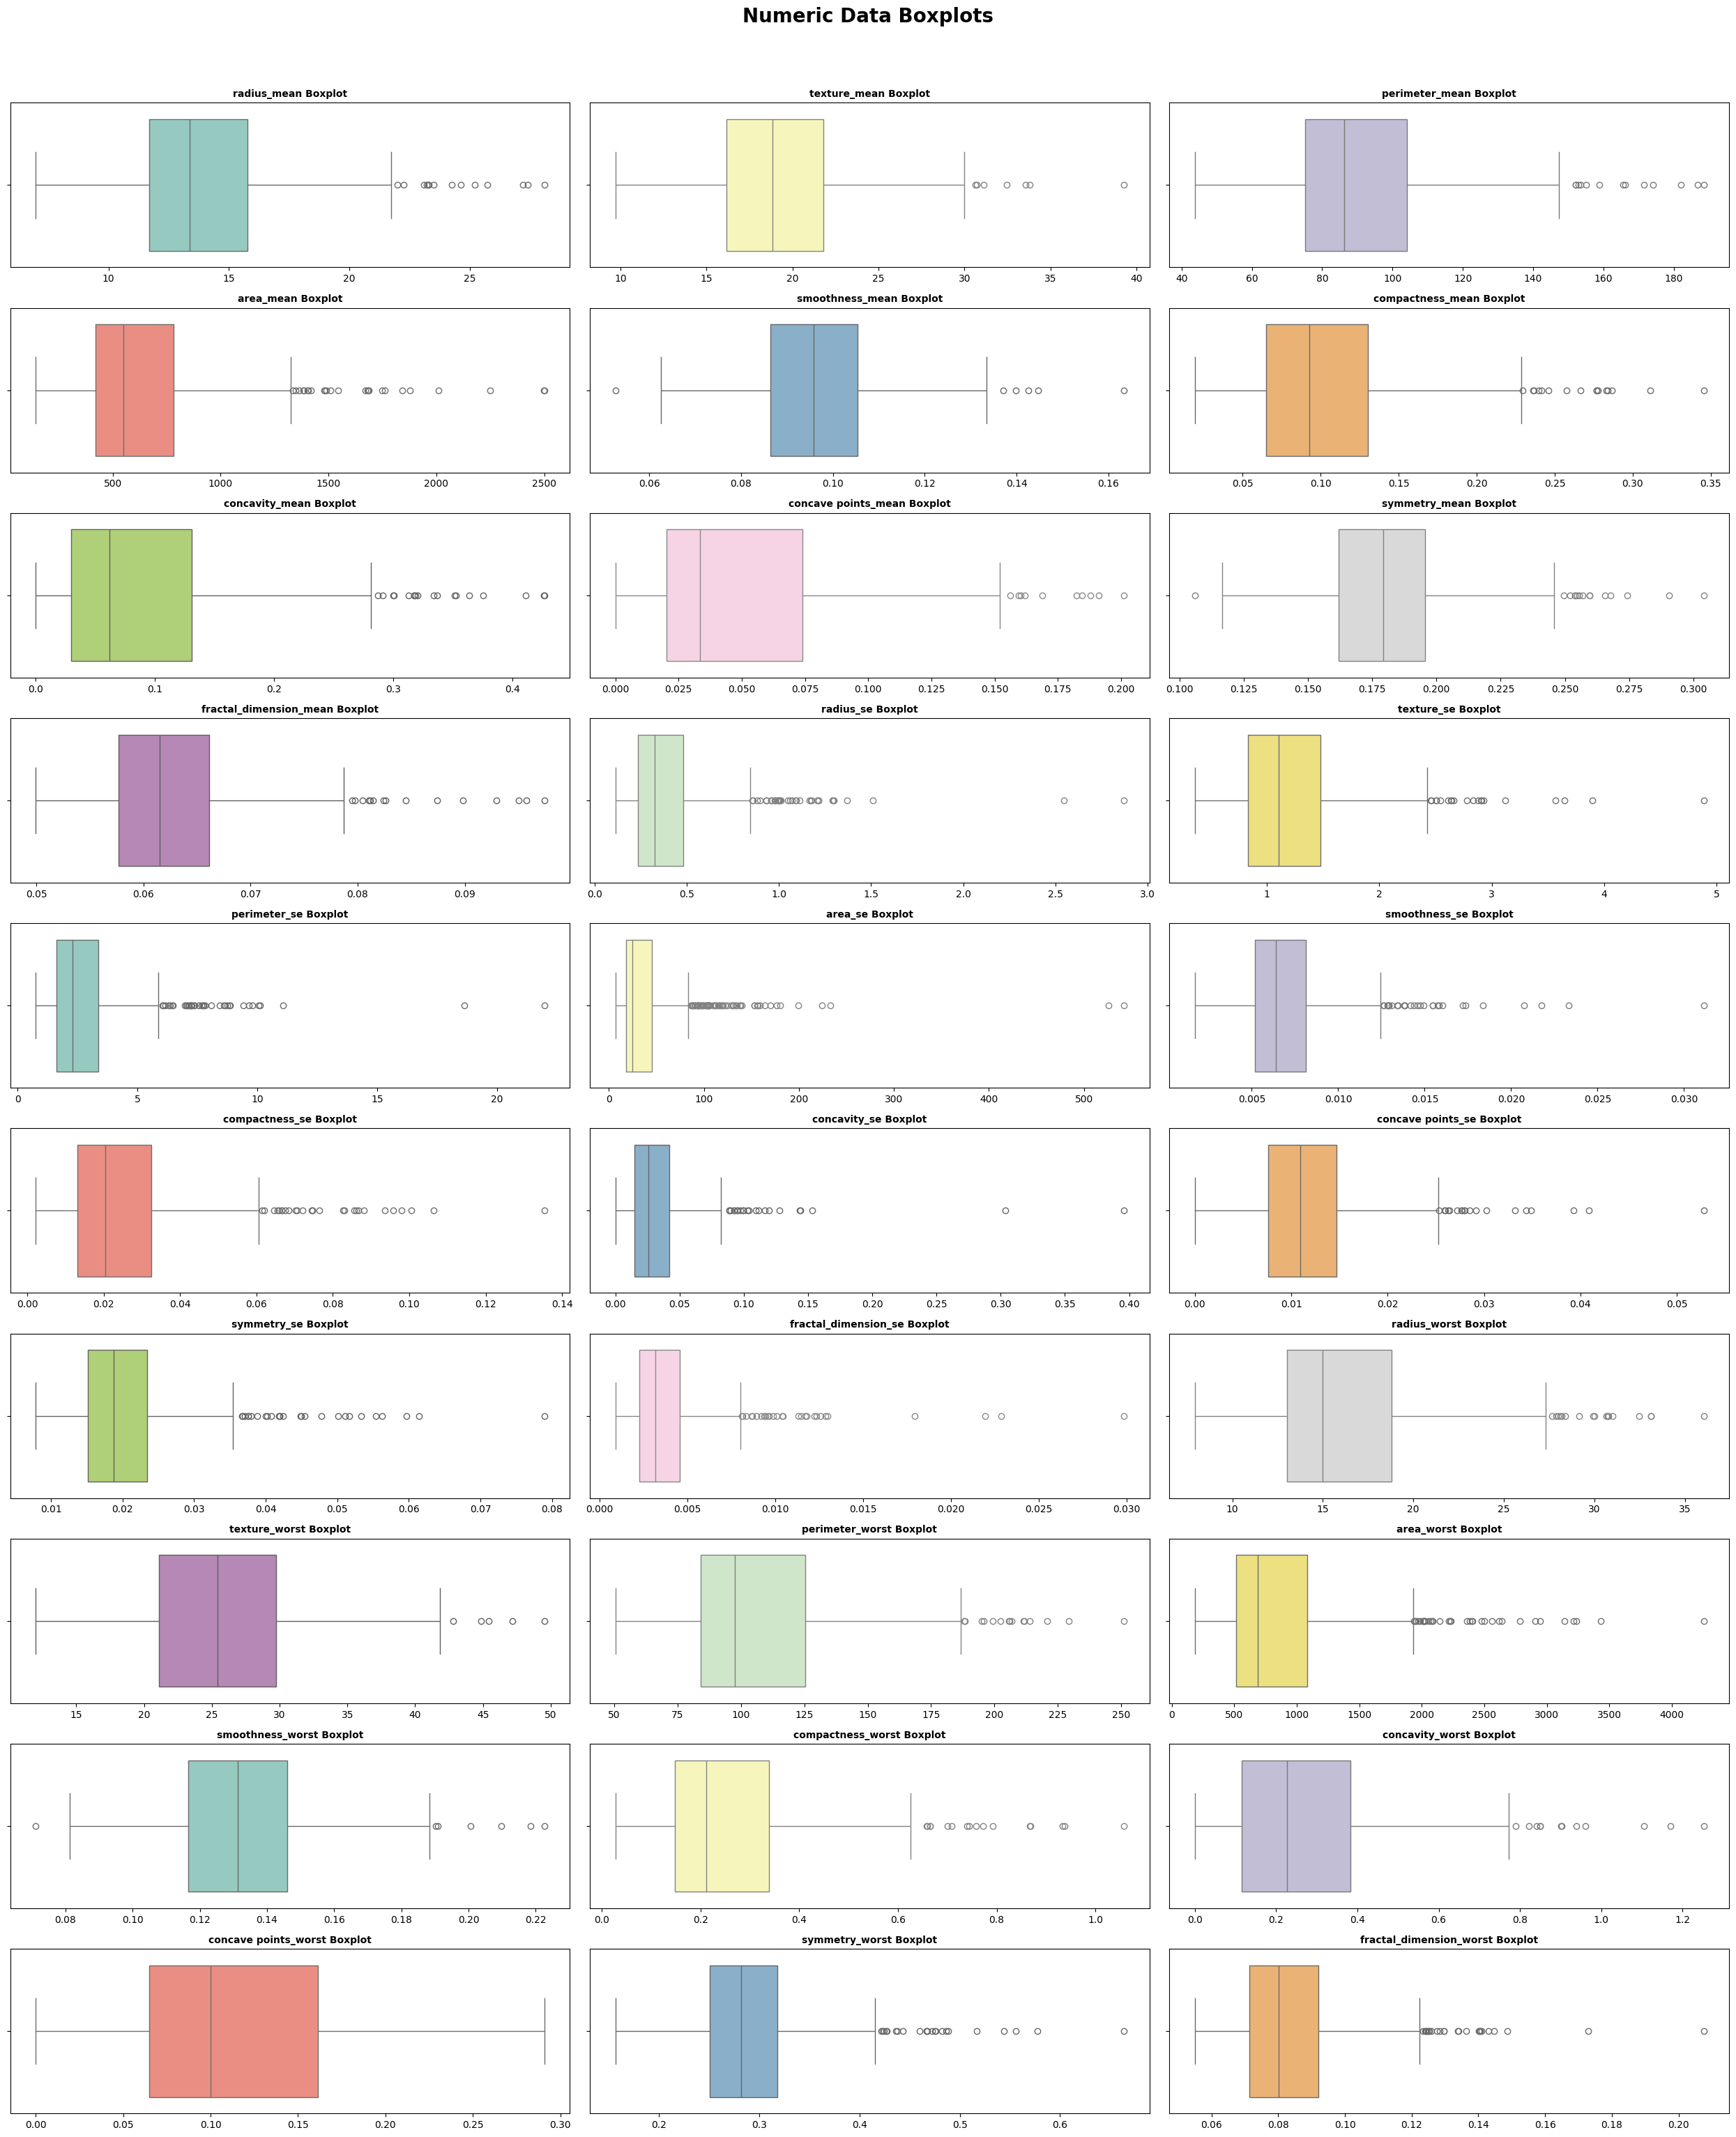

In [17]:
plt.figure(figsize=(25, 30))
palette = sns.color_palette("Set3", n_colors=len(numeric_f))
for i, col in enumerate(numeric_f):
  plt.subplot(10, 3, i+1)
  sns.boxplot(data=df, x =col, color=palette[i])
  plt.title(f"{col} Boxplot", fontsize=10, weight='bold')
  plt.xlabel("")
plt.suptitle("Numeric Data Boxplots", fontsize=20, weight='bold', y=1.02)
plt.tight_layout()

**Outliers Detection**
- Features with weird 2 to 3 points far outliers => Radius_mean, texture_mean, are_mean, smoothness_mean, compactness_mean, concavity_mean, symetry mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimention_se, ....

<Axes: >

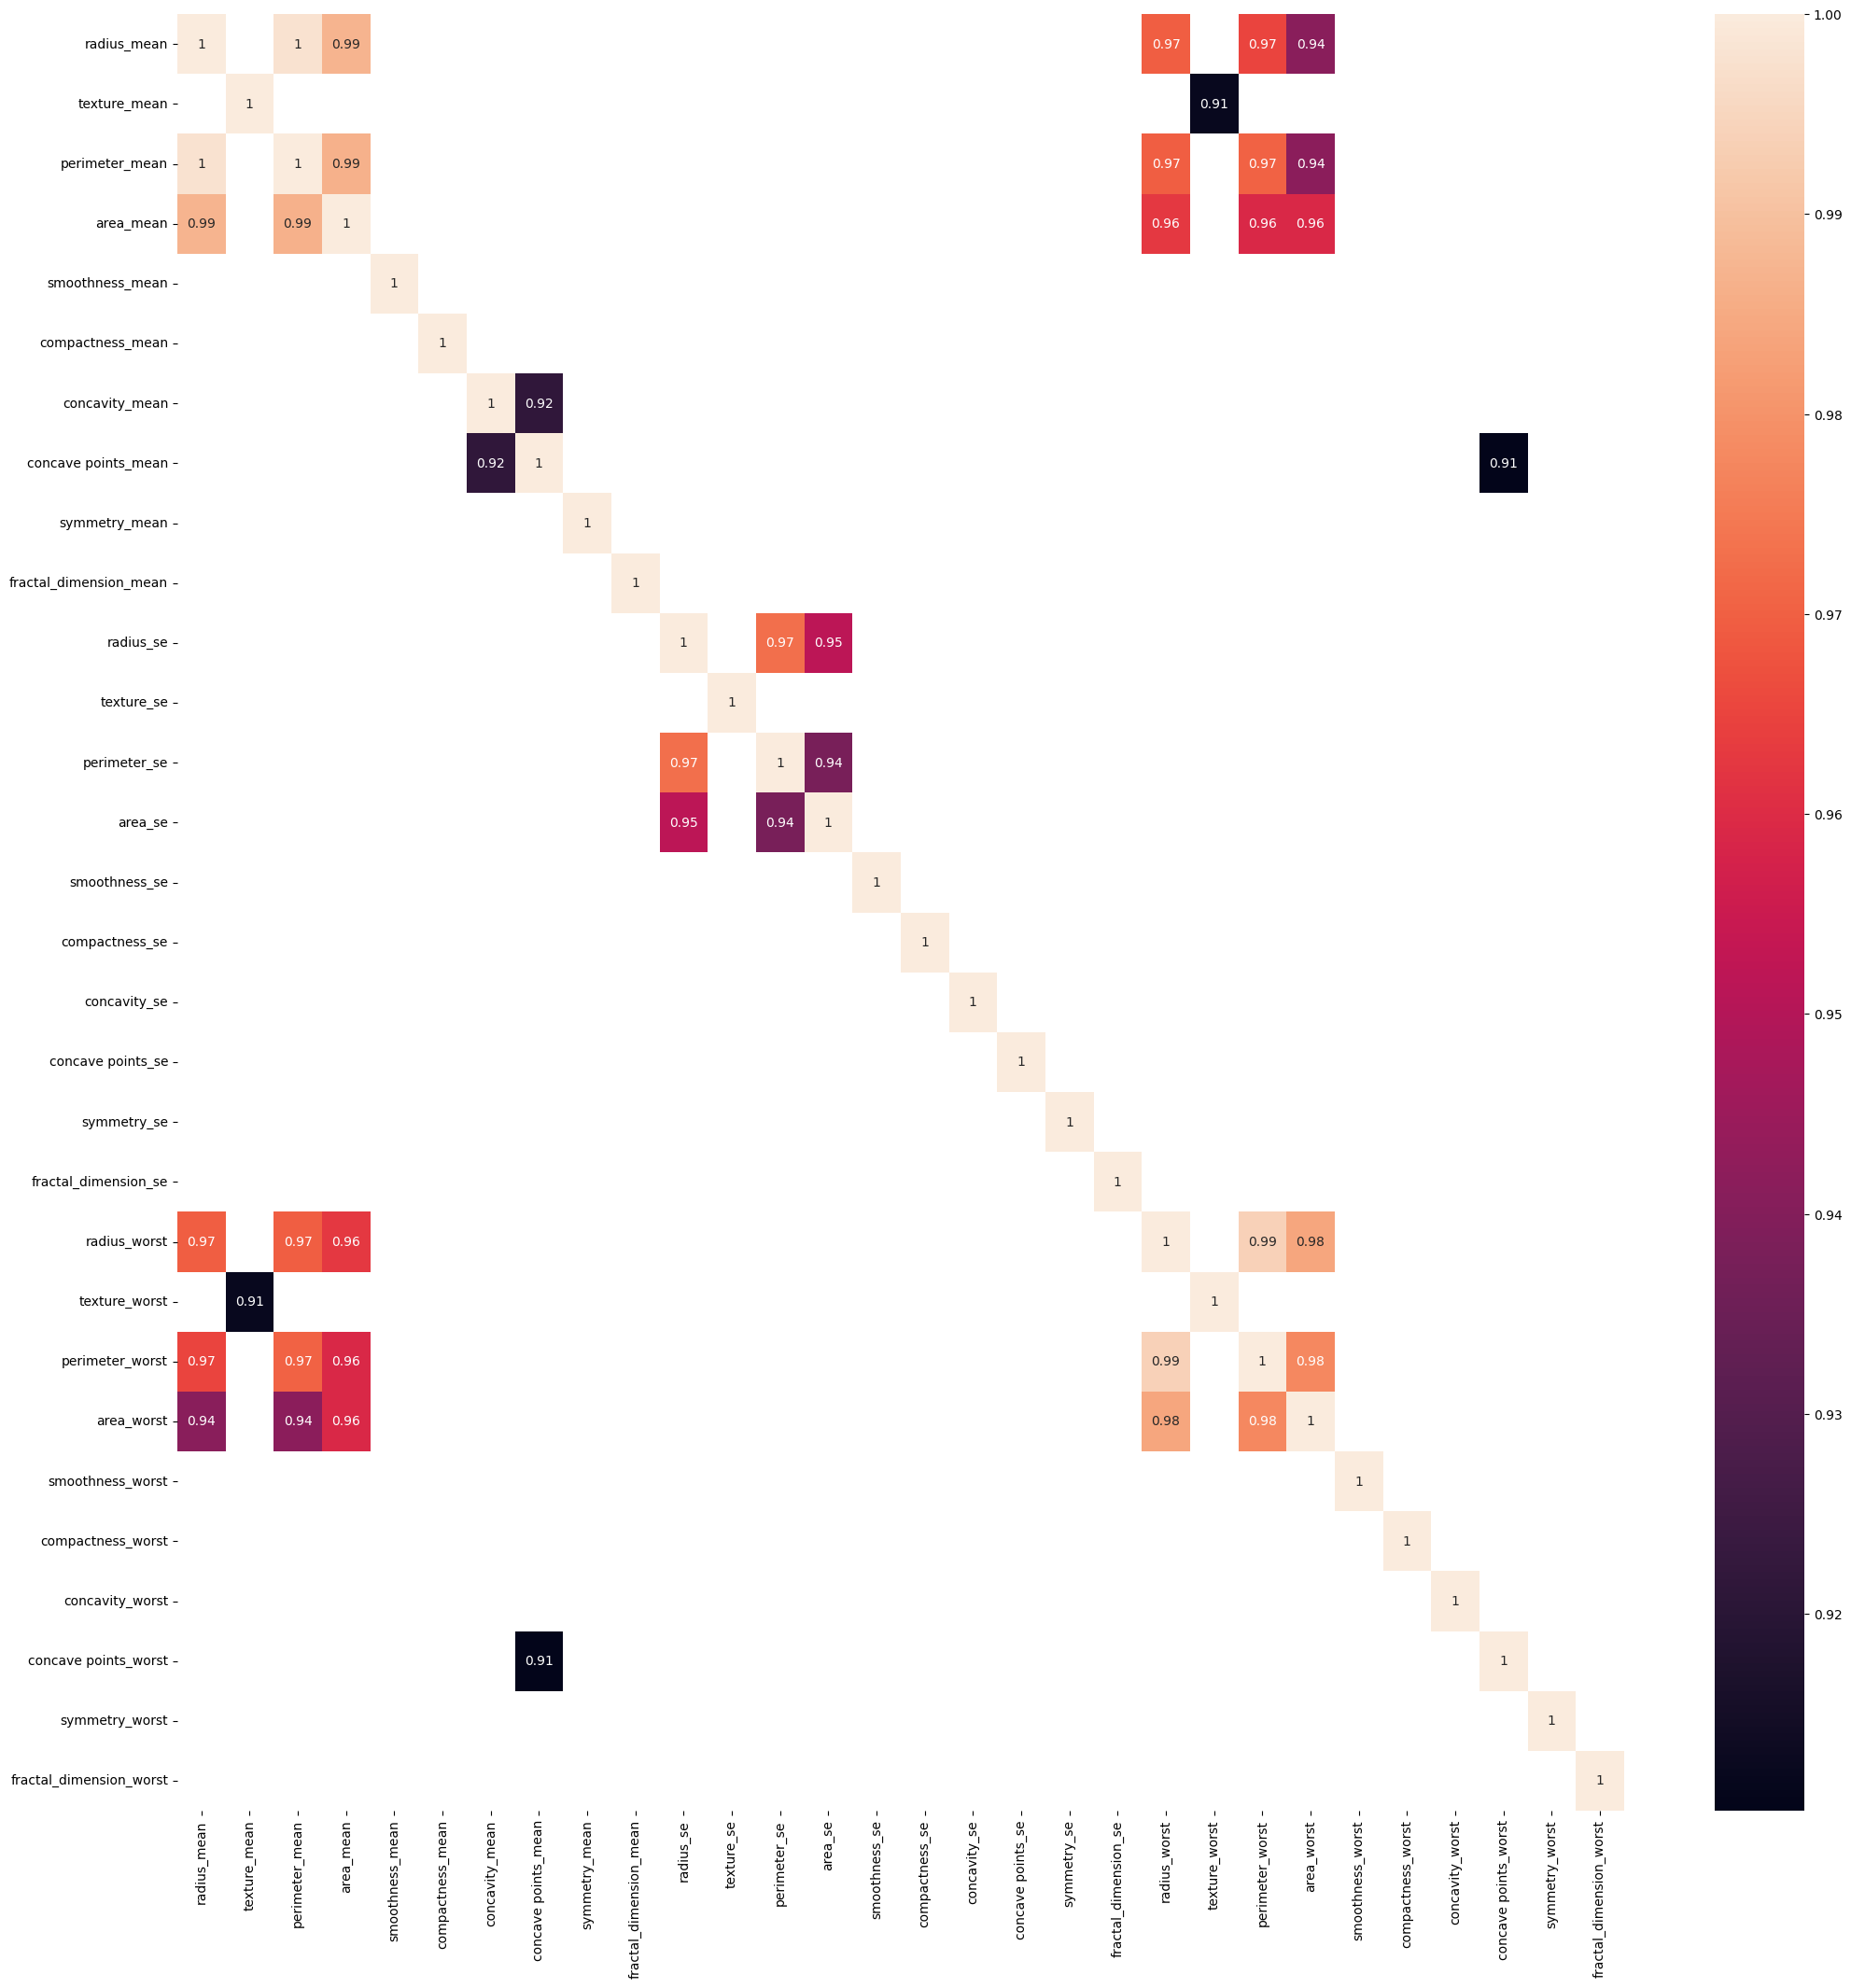

In [18]:
plt.figure(figsize=(25, 25))
corr = numeric_data.corr()
strong = corr.mask(corr.abs() < 0.9)
sns.heatmap(strong, annot=True)

- Radius_mean & parameter_mean =1
- Radius_mean & area_mean = 0.99
- premeter_mena & area_mean =0.99
- radius_worst & perimeter_worst= 0.99
- radius_worst & area_worst = 0.98
- area_worst & peremeter_worst =0.98
- radius_mean & perimeter_worst & radius_worst =0.97
- peremeter_mean & peremeter_worst & radius_worst = 0.97
- peremeter_se & radius_se =0.97
- area_mean &(area_worst, premeter_worst, radius_worst) = 0.96
- area_se & radius_se
- area_mean & radius_worst =0.96
- area mean & area_worst = 0.96


In [19]:
# strong

In [20]:
numeric_data['Diagnosis_n'] = df['Diagnosis'].map({"B":0 , "M":1})

In [21]:
numeric_data.corr()['Diagnosis_n'].sort_values()

,Diagnosis_n
smoothness_se,-0.067016
fractal_dimension_mean,-0.012838
texture_se,-0.008303
symmetry_se,-0.006522
fractal_dimension_se,0.077972
concavity_se,0.253730
compactness_se,0.292999
fractal_dimension_worst,0.323872
symmetry_mean,0.330499
smoothness_mean,0.358560


**Dropping Decisions**
- From these
Radius_mean & parameter_mean =1
Radius_mean & area_mean = 0.99
premeter_mena & area_mean =0.99
- Keep premeter_mean Drop area_mean & radius_mean
-From These
radius_worst & perimeter_worst= 0.99
radius_worst & area_worst = 0.98
area_worst & peremeter_worst =0.98
radius_mean & perimeter_worst & radius_worst =0.97
peremeter_mean & peremeter_worst & radius_worst = 0.97
- Keep Premeter_worse Drop radius_worse, area_worse
- From this peremeter_se & radius_se =0.97
 area_mean &(area_worst, premeter_worst, radius_worst) = 0.96
 area_se & radius_se
- Keep radius_se, Drop paremter_se, area_se

In [22]:
df.drop(['area_mean', 'radius_mean', 'radius_worst', 'area_worst', 'perimeter_se', 'area_se'], axis=1, inplace= True)

In [23]:
numeric_data.drop(['area_mean', 'radius_mean', 'radius_worst', 'area_worst', 'perimeter_se', 'area_se'], axis=1, inplace= True)

- Now there are very low correlation with the target and those
smoothness_se,
fractal_dimension_mean,
texture_se	,
symmetry_se	,
fractal_dimension_se

In [24]:
low_corr = ["smoothness_se", "fractal_dimension_mean", "texture_se" , "symmetry_se" , "fractal_dimension_se", "Diagnosis_n"]

<Figure size 3000x3000 with 0 Axes>

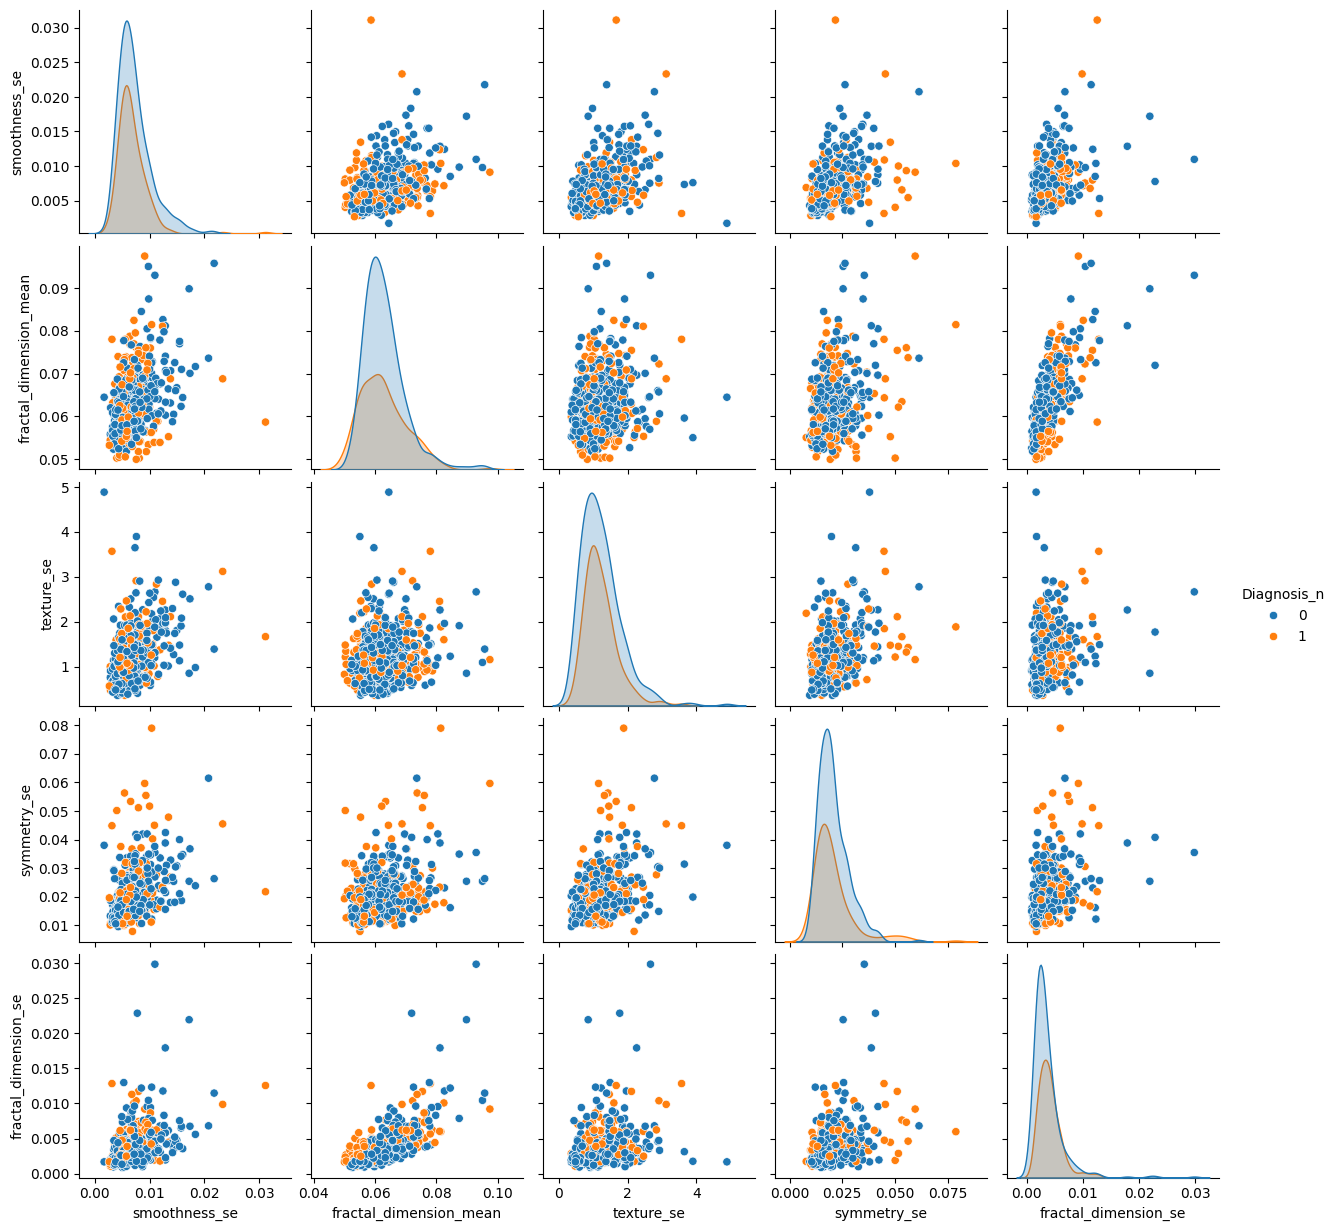

In [25]:
plt.figure(figsize=(30, 30))
sns.pairplot(numeric_data[low_corr], hue="Diagnosis_n")

- There dont seem to be nonlinear realation they all apear to be overlapping
- The correclation between them and the target is very low
- Safe to say they can be removed

In [26]:
df.drop(["smoothness_se", "fractal_dimension_mean", "texture_se" , "symmetry_se" , "fractal_dimension_se"], axis=1, inplace=True)
numeric_data.drop(["smoothness_se", "fractal_dimension_mean", "texture_se" , "symmetry_se" , "fractal_dimension_se"], axis=1, inplace=True)

In [27]:
df.shape

(569, 20)

In [28]:
numeric_f = numeric_data.columns.to_list()
len(numeric_f)

20

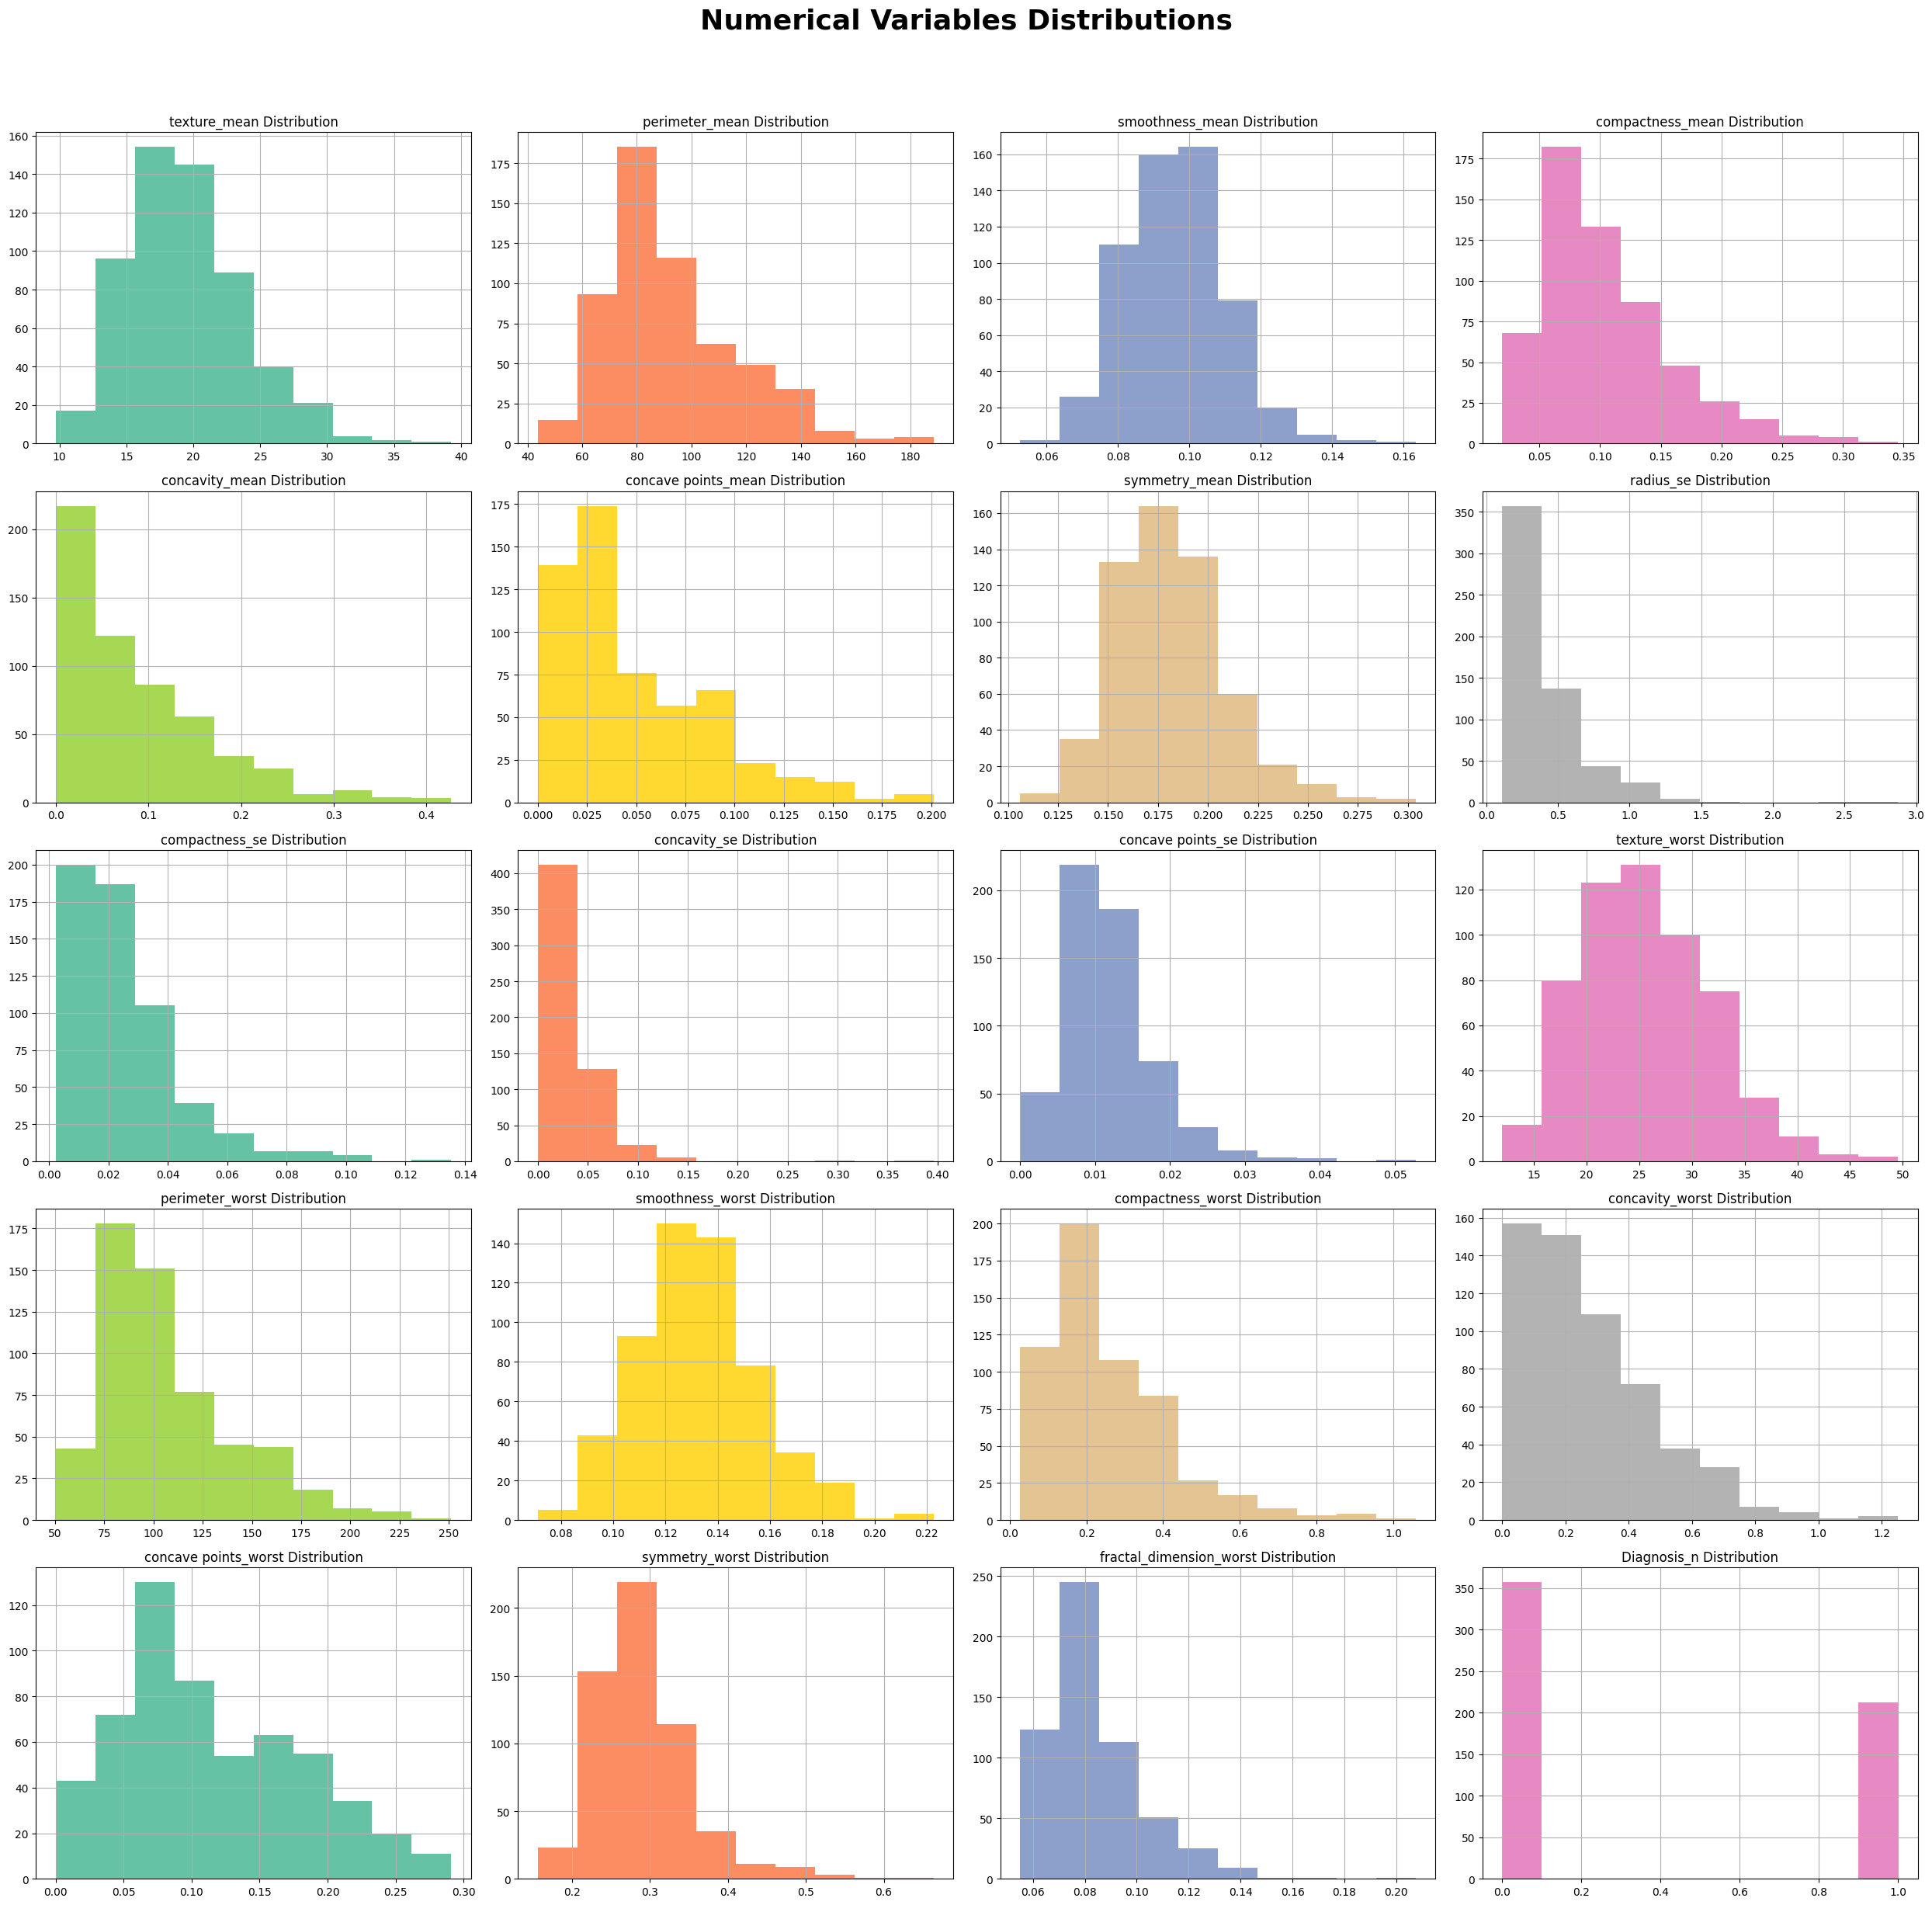

In [29]:
plt.figure(figsize=(25, 25))
palette = sns.color_palette("Set2", n_colors=len(numeric_f))
for i, col in enumerate(numeric_f):
  plt.subplot(5, 4, i+1)
  numeric_data[col].hist(color = palette[i])
  plt.title(f"{col} Distribution")
plt.suptitle("Numerical Variables Distributions", fontsize=26, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])

In [30]:
len(numeric_f)

20

In [32]:
features_skewed = numeric_data.drop(['concave points_worst','Diagnosis_n'], axis=1).columns.to_list()
features_normal = ['concave points_worst']

**Modeling Prep Steps**
1. Scale data (skewed wil go through log trans then robust scaler,   normal
will go through standard scaler)
2. Try model with balanced equals true first
3. Use SMOTE on data to try balancing it
- Before using SMOTE [[71  1]
 [ 3 39]]

- adasyn [[70  2][ 2 40]]
- smoteenn [[71  1][ 1 41]]
- smotetomek  [[71  1][ 3 39]]

In [33]:
numeric_data.columns

Index(['texture_mean', 'perimeter_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'texture_worst',
       'perimeter_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst', 'Diagnosis_n'],
      dtype='object')

In [159]:
X = numeric_data.drop(['Diagnosis_n'], axis=1)
y = numeric_data['Diagnosis_n']

In [160]:
xtrain, xtest,ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

([<matplotlib.axis.XTick at 0x7da01553d9a0>,
 [Text(0, 0, 'Bengign'), Text(1, 0, 'Malignant')])

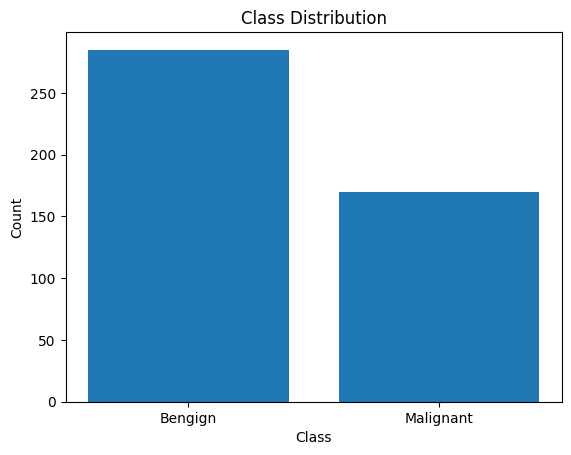

In [129]:
plt.bar(ytrain.value_counts().index, ytrain.value_counts().values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(ytrain.value_counts().index, ['Bengign', 'Malignant'])

In [161]:
smote = SMOTEENN(random_state=42)
xtrain,ytrain = smote.fit_resample(xtrain, ytrain)

([<matplotlib.axis.XTick at 0x7da015aa8860>,
 [Text(1, 0, 'Bengign'), Text(0, 0, 'Malignant')])

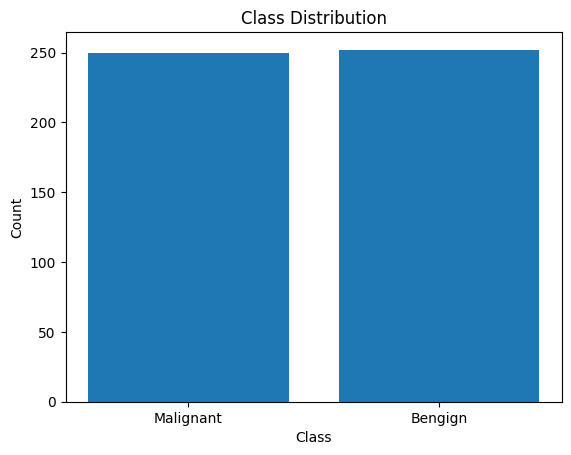

In [112]:
plt.bar(ytrain.value_counts().index, ytrain.value_counts().values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(ytrain.value_counts().index, ['Bengign', 'Malignant'])

In [162]:
xtrain[features_skewed] = np.log1p(xtrain[features_skewed])
xtest[features_skewed] = np.log1p(xtest[features_skewed])

In [163]:
robust = RobustScaler()

In [164]:
xtrain[features_skewed] = robust.fit_transform(xtrain[features_skewed])
xtest[features_skewed] = robust.transform(xtest[features_skewed])

In [165]:
standard = StandardScaler()

In [166]:
xtrain[features_normal] = standard.fit_transform(xtrain[features_normal])
xtest[features_normal] = standard.transform(xtest[features_normal])

In [167]:
model = LogisticRegression(random_state=42)

In [168]:
model.fit(xtrain,ytrain)

LogisticRegression(random_state=42)

In [169]:
y_pred = model.predict(xtest)

print("Accuracy:", accuracy_score(ytest, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(ytest, y_pred))
print("\nClassification Report:\n", classification_report(ytest, y_pred))

Accuracy: 0.9736842105263158

Confusion Matrix:
 [[71  1]
 [ 2 40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [170]:
y_pred_train = model.predict(xtrain)

print("Accuracy:", accuracy_score(ytrain, y_pred_train))
print("\nConfusion Matrix:\n", confusion_matrix(ytrain, y_pred_train))
print("\nClassification Report:\n", classification_report(ytrain, y_pred_train))

Accuracy: 0.99800796812749

Confusion Matrix:
 [[250   0]
 [  1 251]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       252

    accuracy                           1.00       502
   macro avg       1.00      1.00      1.00       502
weighted avg       1.00      1.00      1.00       502



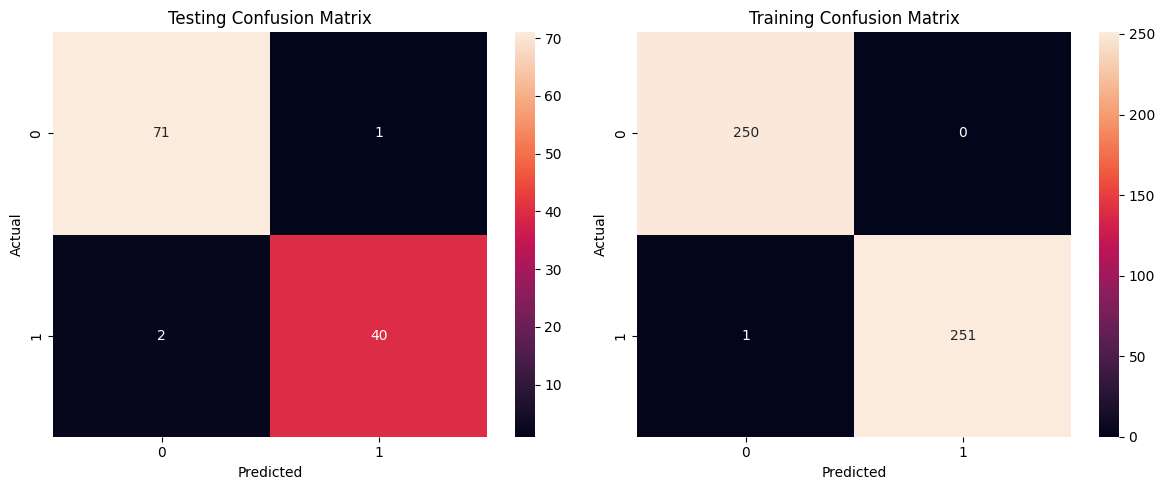

In [171]:
plt.figure(figsize=(12, 5))
cm = confusion_matrix(ytest, y_pred)
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Testing Confusion Matrix")

cm2 = confusion_matrix(ytrain, y_pred_train)
plt.subplot(1, 2, 2)
sns.heatmap(cm2, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Training Confusion Matrix")
plt.tight_layout()

In [172]:
y_prob = model.predict_proba(xtest)[:, 1]
# y_prob

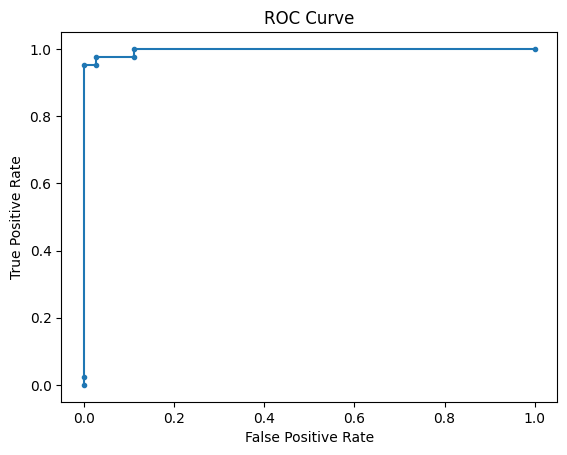

AUC Score: 1.00


In [173]:
fpr, tpr, _ = roc_curve(ytest, y_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

auc_score = roc_auc_score(ytest, y_prob)
print(f"AUC Score: {auc_score:.2f}")

- From a medical POV here the heavy part i want to focus on is the FN were i diagnosed someone as benign when their cancer is malignant so this is what my choice depended on
- the best results i got for the FN was when i combined smote with logRobust & scalling features with only 2 FN in test and 1 in train
- From my model the error prediction was only 1 was told they are malignant falsly and 2 were told they were bengin while not
- The model doesnt seem to overfit from the gp between the accuracy and the f1score of the training and testing which is a good sign
- The AUC score is perfect maybe because the data is small so the model wasnt too complex